In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk

In [2]:
data = pd.read_csv("data/rawdata1.csv", encoding='latin-1')

In [3]:
data.head()

,Identifier,Item_Name,Brand,Manufacturer,Category
0,B0002HWTOQ,"Ravensburger Spiel 27075 - Rommé, Canasta, Bridge",NaN,Ravensburger,2102300
1,B019YGSAPW,Ravensburger Spiele 23409 - Schwarzer Peter Mi...,Ravensburger Spiele,Ravensburger Spiele,2100300
2,B000QGRCN6,Henrys A01002-S01 - Yo-Yo Ersatzschnüre 6 Stüc...,Henrys,Henrys,2100900
3,B00KB45ULE,"London Teddy Bears 4X-CLQL-QFJN Sorry, es TUT ...",London Teddy Bears,London Teddy Bears,2100700
4,B07NDXZ8ZH,KiddyMoon 90X30cm/300 Bälle ? 7Cm Bällebad Bab...,KiddyMoon,KiddyMoon,2100900


In [4]:
data.isna().any()

Identifier      False
Item_Name       False
Brand            True
Manufacturer     True
Category        False
dtype: bool

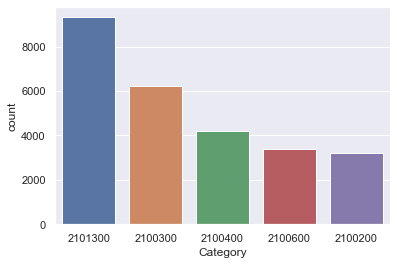

In [5]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Category", data=data, order=data.Category.value_counts().iloc[:5].index)

In [6]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [7]:
data['Clean_name'] = data['Item_Name'].apply(lambda x: clean_text(x))

In [8]:
data.head()

,Identifier,Item_Name,Brand,Manufacturer,Category,Clean_name
0,B0002HWTOQ,"Ravensburger Spiel 27075 - Rommé, Canasta, Bridge",NaN,Ravensburger,2102300,"ravensburger spiel 27075 - rommé, canasta, bridge"
1,B019YGSAPW,Ravensburger Spiele 23409 - Schwarzer Peter Mi...,Ravensburger Spiele,Ravensburger Spiele,2100300,ravensburger spiele 23409 - schwarzer peter mi...
2,B000QGRCN6,Henrys A01002-S01 - Yo-Yo Ersatzschnüre 6 Stüc...,Henrys,Henrys,2100900,henrys a01002-s01 - yo-yo ersatzschnüre 6 stüc...
3,B00KB45ULE,"London Teddy Bears 4X-CLQL-QFJN Sorry, es TUT ...",London Teddy Bears,London Teddy Bears,2100700,"london teddy bears 4x-clql-qfjn sorry, es tut ..."
4,B07NDXZ8ZH,KiddyMoon 90X30cm/300 Bälle ? 7Cm Bällebad Bab...,KiddyMoon,KiddyMoon,2100900,kiddymoon 90x30cm/300 bälle ? 7cm bällebad bab...


c:\python\phyton37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\phyton37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


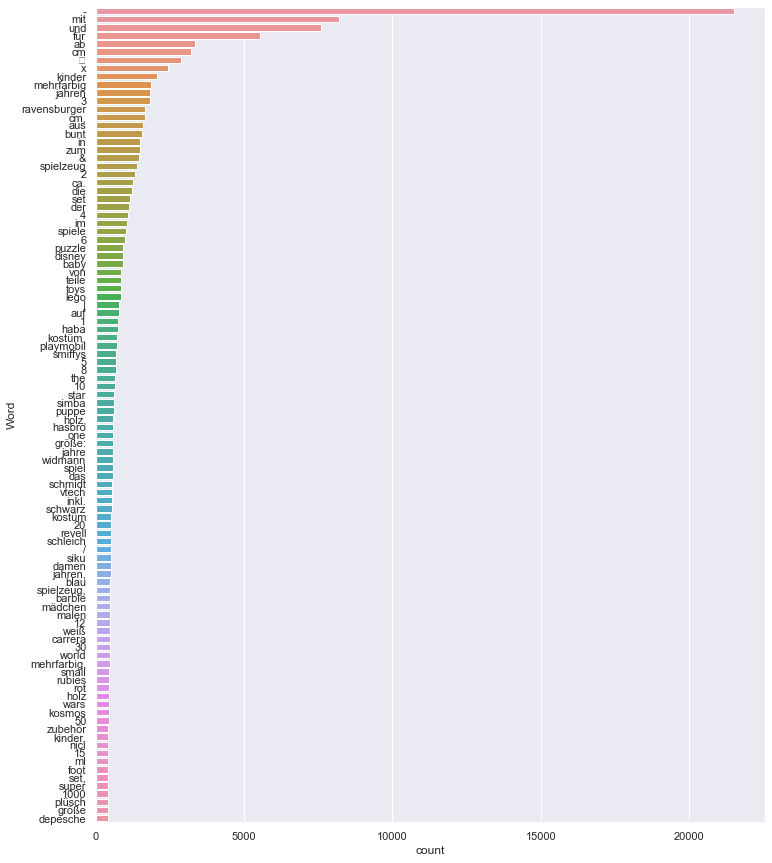

In [9]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(data['Clean_name'], 100)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weiherer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('german'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

data['Clean_name'] = data['Clean_name'].apply(lambda x: remove_stopwords(x))

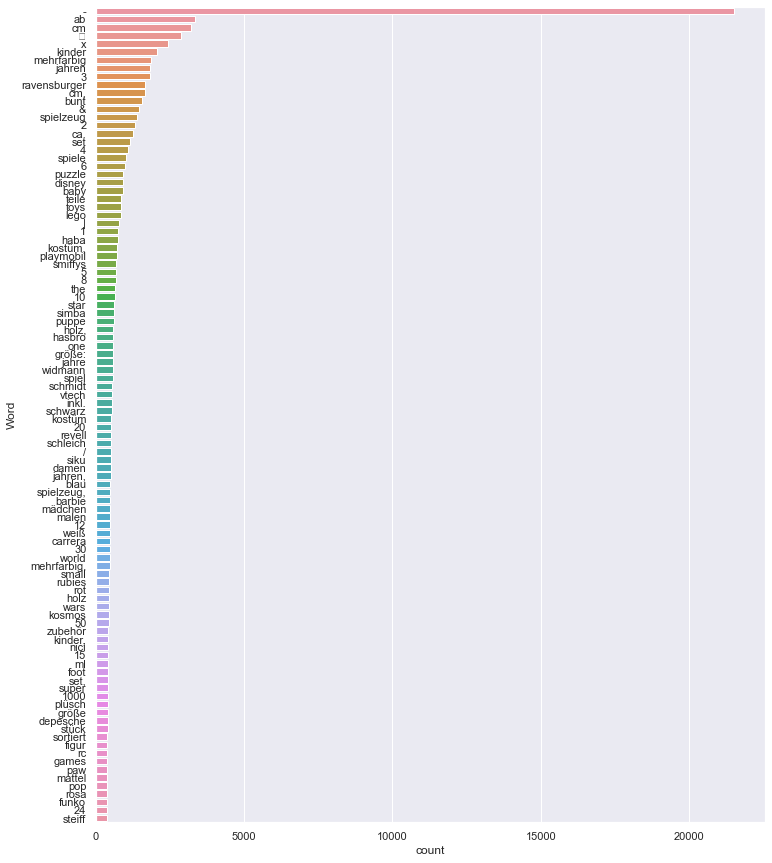

In [12]:
freq_words(data['Clean_name'], 100)